In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading datasets
main_train = pd.read_csv("training_set.csv")
test_dataset = pd.read_csv("test_set.csv")

train_dataset = main_train[:800]
val_dataset = main_train[800:]

X_train = train_dataset.values[:,:-1]
y_train = train_dataset.values[:,-1]

X_val = val_dataset.values[:,:-1]
y_val = val_dataset.values[:,-1]

X_test = test_dataset.values 

## EDA

<AxesSubplot:>

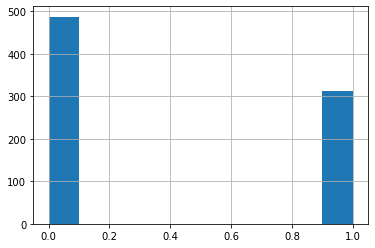

In [3]:
# label distribution
train_dataset['y'].hist()

<AxesSubplot:>

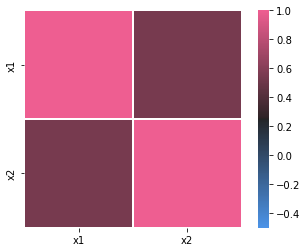

In [4]:
# correlation of features
corr = train_dataset.iloc[:,:-1].corr(method = "pearson")
cmap = sns.diverging_palette(250 , 354,80,60, center = 'dark' , as_cmap = True)
sns.heatmap(corr , vmax =1 , vmin =-0.5  , cmap = cmap , square = True , linewidth = 0.2)

<AxesSubplot:xlabel='x2', ylabel='Count'>

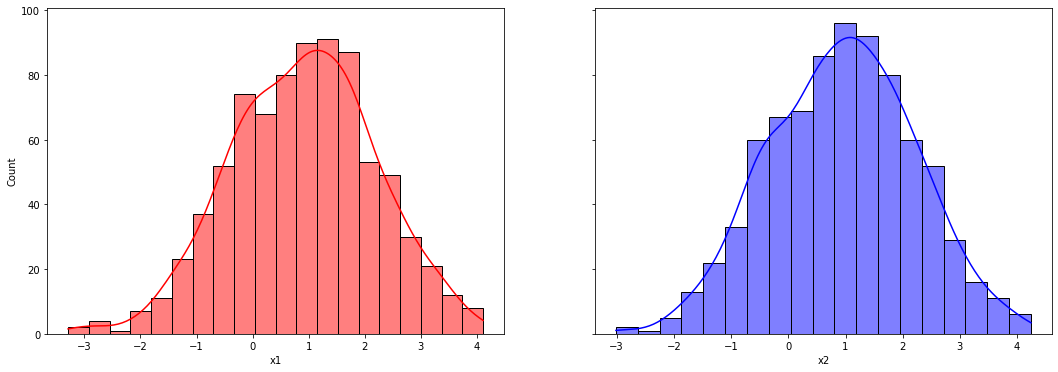

In [5]:
# distribution of each feature
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(train_dataset, ax=axes[0], x="x1", kde=True, color='r')
sns.histplot(train_dataset, ax=axes[1], x="x2", kde=True, color='b')

## Calculate Prior P(Y=y)

In [6]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Calculate P(X=x|Y=y) using Gaussian dist.

In [7]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [8]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

# Validation

In [9]:
Y_pred = naive_bayes_gaussian(train_dataset, X=X_val, Y="y")
acc = np.sum(Y_pred == y_val)/len(y_val)
print(acc)

0.84


# Test

In [10]:
Y_pred = naive_bayes_gaussian(main_train, X=test_dataset.values, Y="y")
Y_pred = np.where(Y_pred == 0 , -1 , 1)
Y_pred

array([-1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1

In [11]:
pd.DataFrame(Y_pred).to_csv("2.csv" , index=None)

In [12]:
pd.read_csv("2.csv")

,0
0,-1
1,1
2,1
3,1
4,-1
...,...
245,-1
246,1
247,-1
248,1
